In [192]:
#Example
import datetime

bounding_box = {'max_lat':65, 'min_lat':60, 'max_lon':-167, 'min_lon':-172}

estimated_breakup_date = datetime.datetime(2000, 3, 15)

In [197]:
import xarray as xr
import datetime

def mean_30d_raster_temps(bounding_box,estimated_breakup_date):
    start_date = estimated_breakup_date - datetime.timedelta(days=30) #30 days or 31 days in total?
    end_date = estimated_breakup_date

    fp = f'/home/jovyan/work/ESDA_hk339/Project/daily_temps.nc'
    ds = xr.open_dataset(fp)
    
    #ds.load()

    temp = ds['TMP_DAILY'] - 273.15#.values
    temp_30d = temp.sel(time=slice(start_date, end_date))
    
    min_lon = bounding_box['min_lon'] + 360
    max_lon = bounding_box['max_lon'] + 360
    
    temp_bbox = temp_30d.sel(
        lat=slice(bounding_box['max_lat'], bounding_box['min_lat']),  #Latitudes go from max to min
        lon=slice(min_lon, max_lon)
    )
    
    mean_30d_temp = temp_bbox.mean().item()
    
    return mean_30d_temp

#lat = ds['lat']#.values
#lon = ds['lon']#.values
#time = ds['time']#.values

#Convert 'strftime' to datetime objects for easier comparison
#time_as_datetime = pd.to_datetime(time.values)
#time_condition = (time_as_datetime >= start_date) & (time_as_datetime <= end_date)

#filtered_temp = temp.sel(time=time_as_datetime[time_condition])

#lat_condition = (lat >= bounding_box['min_lat']) & (lat <= bounding_box['max_lat'])
#lon_condition = (lon >= bounding_box['min_lon']+360) & (lon <= bounding_box['max_lon']+360) #Convert lon to 0-360

#filtered_temp = filtered_temp.sel(lat=lat[lat_condition], lon=lon[lon_condition])
#mean_30d_temp = np.mean(filtered_temp)

In [198]:
mean_30d_temp = mean_30d_raster_temps(bounding_box,estimated_breakup_date)
print(mean_30d_temp)

-8.069668769836426


In [205]:
def monthly_raster_temps(bounding_box):
    fp = f'/home/jovyan/work/ESDA_hk339/Project/monthly_temps.nc'
    ds = xr.open_dataset(fp)
    
    ds.load()
    
    temp = ds['TMP_DAILY']-273.15
    lat = ds['lat']#.values
    lon = ds['lon']#.values
    time = ds['time']#.values
      
    lat_condition = (lat >= bounding_box['min_lat']) & (lat <= bounding_box['max_lat'])
    lon_condition = (lon >= bounding_box['min_lon']+360) & (lon <= bounding_box['max_lon']+360) #Convert lon to 0-360

    extracted_temp = temp.sel(lat=lat[lat_condition], lon=lon[lon_condition])
    
    monthly_temp = extracted_temp.mean(dim=('lat', 'lon'))
    
    return monthly_temp

In [206]:
monthly_temp = monthly_raster_temps(bounding_box)

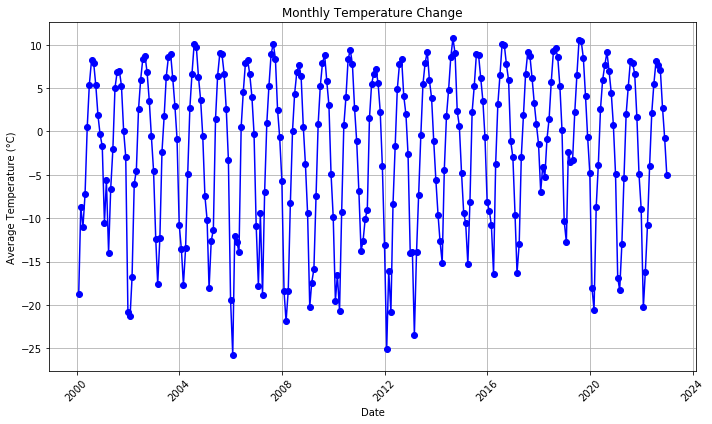

In [210]:
import matplotlib.pyplot as plt

month = monthly_temp.coords['time'].values
time_as_datetime = pd.to_datetime(month, format='%Y-%m')

plt.figure(figsize=(10, 6))
plt.plot(time_as_datetime, monthly_temp, marker='o', linestyle='-', color='b')

plt.title('Monthly Temperature Change')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()